
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de Ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

## Práctica 4 (Parte II). Operaciones Morfológicas

### Introducción
Las transformacion morfológicas son operaciones que se realizan sobre imágenes binarias y se basan en la forma de la imagen. La operación viene determinada por lo que se conoce como elemento estructural. Todas las operaciones morfológicas se derivan de dos operaciones básicas: erosión y dilatación.  A partir de estas se derivan otras operaciones como la apertura, clausura, esqueleto,etc. 


### Erosión
Esta operación lo que hacer es erosionar las fronteras del objeto en primer plano. Para ello el elemento estructural se desplaza a lo largo de la imagen. Si en la imagen de entrada aparece un 1 este será considerado si y solo sí todos los pixeles bajo el kernel están a 1, en otro caso se pone a cero.
<img src="erosion_ani.gif">

El efecto es que los pixeles del objeto que están en la frontera son puestos a cero dependiendo del tamaño del kernel y la forma. 
Supongamos que nuestra imagen es la siguiente:
<img src="img_j.png">

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


(<matplotlib.image.AxesImage at 0x7f39f13e8370>, Text(0.5, 1.0, 'Erosión'))

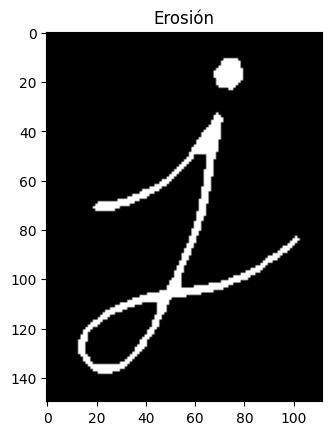

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('img_j.png',0)
kernel = np.ones((5,5),np.uint8)
print(kernel)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,'gray'),plt.title("Erosión")


Si cambiamos el kernel la erosión cambia por ejemplo:

Kernel1:  [[1 1 1 1 1]]
Kernel2:  [[1]
 [1]
 [1]
 [1]
 [1]]


(<Axes: title={'center': 'Erosion2'}>,
 Text(0.5, 1.0, 'Erosion2'))

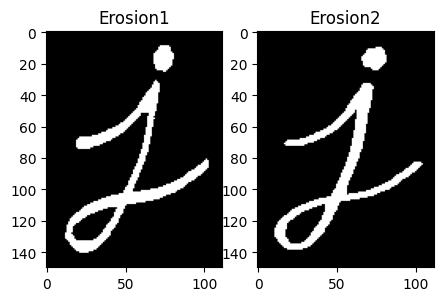

In [15]:
kernel1 = np.ones((1,5),np.uint8)
kernel2= np.ones((5,1),np.uint8)
print("Kernel1: ",kernel1)
print("Kernel2: ",kernel2)
erosion1 = cv2.erode(img,kernel1,iterations = 1)
erosion2 = cv2.erode(img,kernel2,iterations = 1)
plt.figure(figsize=(5,5))

plt.subplot(1,2,1),plt.imshow(erosion1,'gray'),plt.title("Erosion1")
plt.subplot(1,2,2),plt.imshow(erosion2,"gray"),plt.title("Erosion2")


Sobre imágenes que no sean binarias, de niveles de gris, podemos aplicar la erosión. La idea es ahora que en la imagen resultantes se pone el valor mínimo de la imagen original en la que afecta el elemento estructural.

(<Axes: title={'center': 'Erosion'}>,
 Text(0.5, 1.0, 'Erosion'))

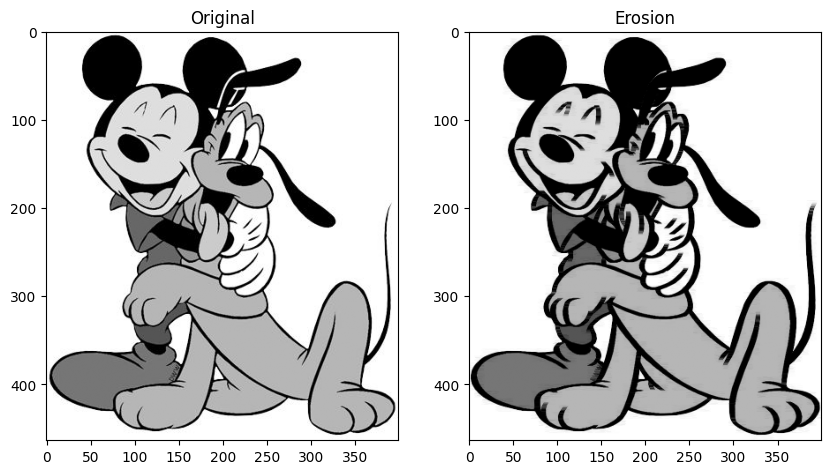

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_gray = cv2.imread('miki_pluto.jpg',0)
k = np.ones((1,5),np.uint8)
img_g_erode=cv2.erode(img_gray,k,iterations=1) 
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(img_gray,"gray"),plt.title("Original")
plt.subplot(122),plt.imshow(img_g_erode,"gray"),plt.title("Erosion")


### Dilatación
La dilatación es justa la operación opuesta a la erosión. En la imagen de salida habrá un 1 si al menos un pixel bajo el elemento estructural es 1. Por lo tanto cuando el elemento estructural llega a la frontera de los objetos estas fronteras se extienden. 
Para eliminar ruido se puede combinar la operación de erosión y a continuación la operación de dilatación.
De la misma forma que en la erosión, la dilatación del objeto depende de la forma del elemento estructural. 
<img src="dilatacion_ani.gif">


(<matplotlib.image.AxesImage at 0x7f3a2c05c4c0>, Text(0.5, 1.0, 'Dilatación'))

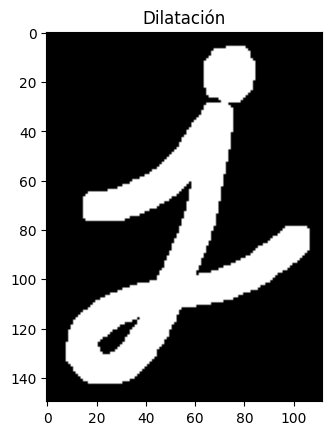

In [17]:
kernel = np.ones((5,5),np.uint8)
dilatacion = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilatacion,'gray'),plt.title("Dilatación")

Podemos obtener una falsa frontera si a la dilatación le restamos la propia imagen. Tambien se puede obtener una frontera interior si a la imagen original le restamos la erosion

(<Axes: title={'center': 'Frontera Interior'}>,
 Text(0.5, 1.0, 'Frontera Interior'))

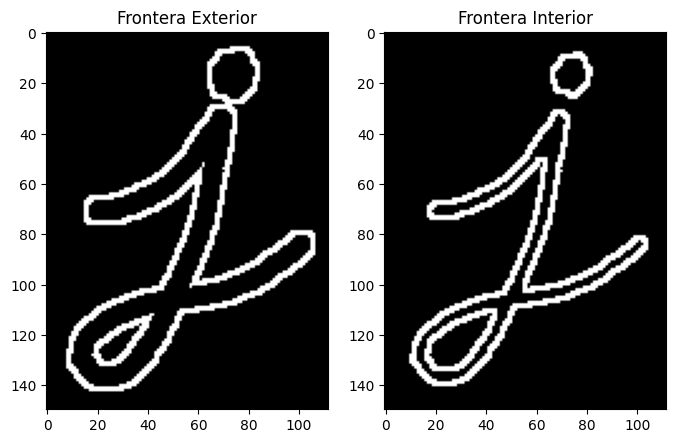

In [18]:
f_ext=dilatacion -img
f_int=img-erosion
plt.figure(figsize=(8,8))
plt.subplot(1,2,1),plt.imshow(f_ext,"gray"),plt.title("Frontera Exterior")
plt.subplot(1,2,2),plt.imshow(f_int,"gray"),plt.title("Frontera Interior")

Sobre imágenes no binarias también podemos obtener la dilatación. Así en la imagen resultante
en un pixel se pone el máximo de la imagen de entrada de entre los pixeles que afecta el 
elemento estructural.

(<Axes: title={'center': 'Dilatacion'}>,
 Text(0.5, 1.0, 'Dilatacion'))

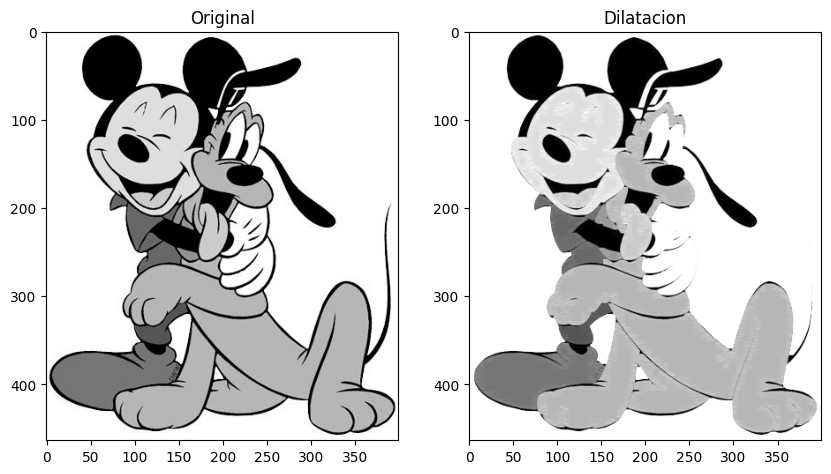

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_gray = cv2.imread('miki_pluto.jpg',0)
k = np.ones((1,5),np.uint8)
img_g_dilate=cv2.dilate(img_gray,k,iterations=1) 
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(img_gray,"gray"),plt.title("Original")
plt.subplot(122),plt.imshow(img_g_dilate,"gray"),plt.title("Dilatacion")

## Apertura
Es la operación que surge de aplicar en primer lugar una erosión y a continuación una dilatación. Es una operación que puede ser útil para eliminar ruido. 

(<Axes: title={'center': 'Apertura'}>,
 Text(0.5, 1.0, 'Apertura'))

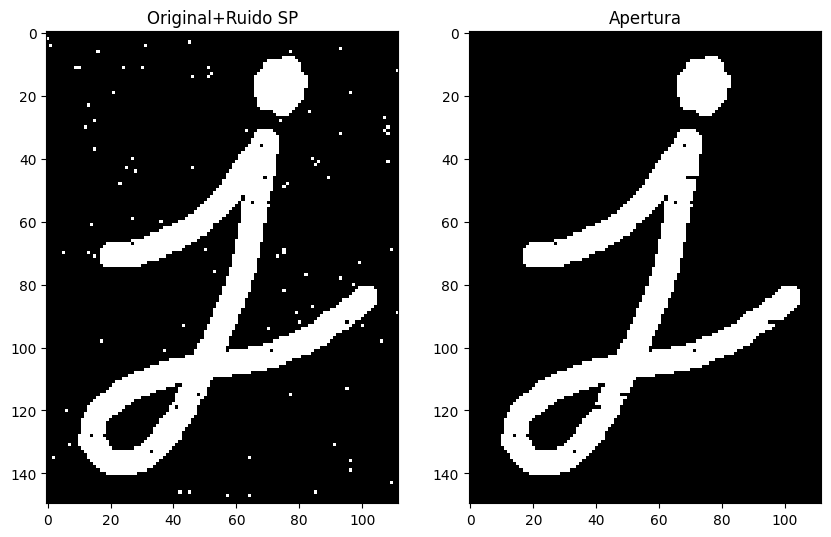

In [20]:
def addsalt_pepper(img, SNR):
    img_ = img.copy()
    h, w = img_.shape
    #snr numero de pixeles que se quedaran sin ruido
    mask = np.random.choice((0, 1, 2), size=(h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    img_[mask == 1] = 255 # sal
    img_[mask == 2] = 0 #  pimienta
    return img_

img = cv2.imread('img_j.png',0)
img_s = addsalt_pepper(img,0.99)
kernel = np.ones((1,3),np.uint8)
opening = cv2.morphologyEx(img_s, cv2.MORPH_OPEN, kernel,iterations=1)
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(img_s,"gray"),plt.title("Original+Ruido SP")
plt.subplot(122),plt.imshow(opening,"gray"),plt.title("Apertura")


Otro ejemplo interesante resulta cuando tenemos dos regiones conectadas por un puente muy débil. La apertura obtendrá la separación de estas dos regiones.

(<Axes: title={'center': 'Apertura'}>,
 Text(0.5, 1.0, 'Apertura'))

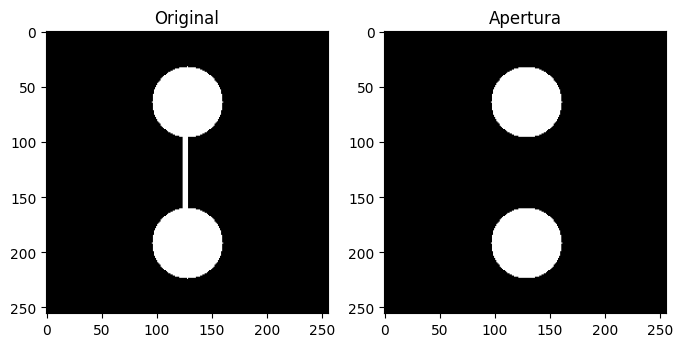

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=np.zeros((256,256),dtype='uint8')
img= cv2.circle(img, (128,64),32 ,255,-1)
img= cv2.circle(img, (128,192),32 ,255,-1)
img=cv2.rectangle(img,(124,96),(128,160),255,-1)
kernel = np.ones((1,6),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations=1)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1),plt.imshow(img,"gray"),plt.title("Original")
plt.subplot(1,2,2),plt.imshow(opening,"gray"),plt.title("Apertura")
  

### Clausura
Es la operación que surge por la concatenación de la dilatación y a continuación la erosión. Es una operación que resulta útil cuando pretendemos tapar agujeros. 

(<Axes: title={'center': 'Clausura'}>,
 Text(0.5, 1.0, 'Clausura'))

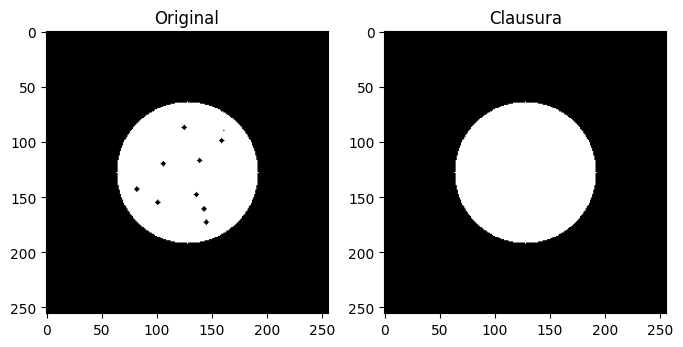

In [22]:
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=np.zeros((256,256),dtype='uint8')
img_black=np.ones((16,16),dtype='uint8')*255

img= cv2.circle(img, (128,128),64 ,255,-1)

img_black= cv2.circle(img_black, (8,8),2 ,0,-1)
#Generamos posiciones aleatorias
N=16;
x1=128-64
x2=128+64;
y1=128-64
y2=128+64
for i in range(N):
    x=random.randint(x1,x2)
    y=random.randint(y1,y2)
    if (np.sqrt((x-128)*(x-128)+(y-128)*(y-128))<50):
        img[y-8:y+8,x-8:x+8]=img_black;

kernel = np.ones((5,5),np.uint8)        
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)        
plt.figure(figsize=(8,8))        
plt.subplot(1,2,1),plt.imshow(img,'gray') ,plt.title("Original")   
plt.subplot(1,2,2),plt.imshow(closing,'gray') ,plt.title("Clausura")   
    

### Gradiente Morfológico
Es la diferencia entre la dilatacion y la erosión.

(<Axes: title={'center': 'Mor. Gradiente'}>,
 Text(0.5, 1.0, 'Mor. Gradiente'))

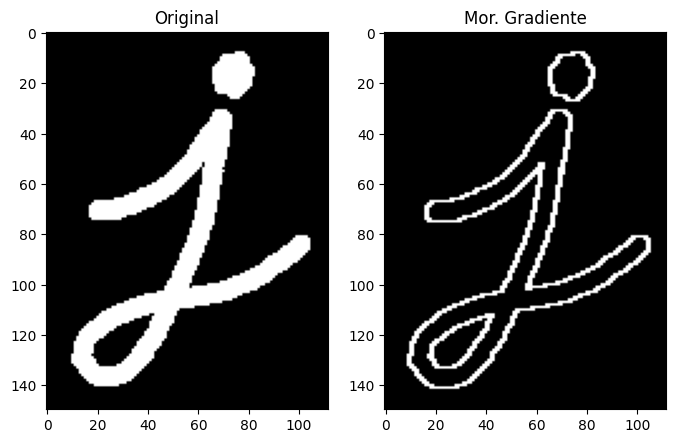

In [23]:
img = cv2.imread('img_j.png',0)

kernel = np.ones((2,3),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(8,8))        
plt.subplot(1,2,1),plt.imshow(img,'gray') ,plt.title("Original")   
plt.subplot(1,2,2),plt.imshow(gradient,'gray') ,plt.title("Mor. Gradiente")   

### Black Hat y Top Hat
Black Hat es la diferencia entre la clausura y la imagen.
Top hat es la diferencia la imagen y la apertura 

Idea de Black-Hat (clausura (dilatacion+erosión)-imagen),obtiene una imagen que contiene objetos que:
 * Son más pequeños que el elemento estructural
 * Son más oscuros que su entorno
 
Idea de Top-Hat (imagen-apertura (erosión+dilatación)), obtiene una imagen que contiene objetos que:
 * Son más pequeños que el elemento estructural
 * Son más claros que su entorno


(<Axes: title={'center': 'Apertura Negativo'}>,
 Text(0.5, 1.0, 'Apertura Negativo'))

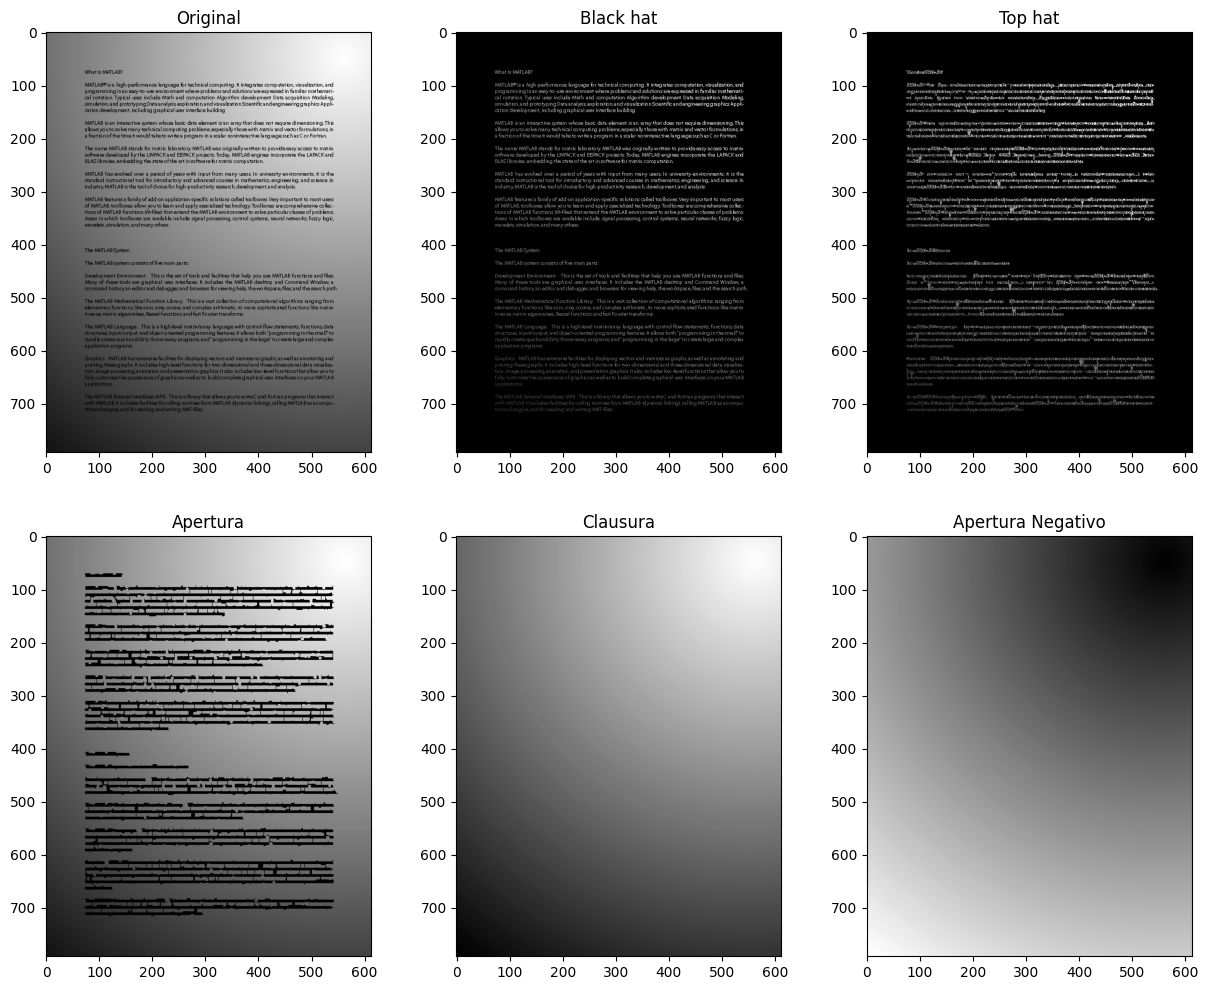

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#img = cv2.imread('dalmata.jpg',0)
#img = cv2.imread('coins.png',0)
img = cv2.imread('gradient_with_text.tif',0)
Ineg= (255-img)
k = np.ones((5,5),np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)
tophat =cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)
aper=cv2.morphologyEx(img, cv2.MORPH_OPEN, k)
clau=cv2.morphologyEx(img, cv2.MORPH_CLOSE, k)
aper_neg =cv2.morphologyEx(Ineg, cv2.MORPH_OPEN, k)
plt.figure(figsize=(15,12))        
plt.subplot(2,3,1),plt.imshow(img,'gray') ,plt.title("Original")   
plt.subplot(2,3,2),plt.imshow(blackhat,'gray') ,plt.title("Black hat")   
plt.subplot(2,3,3),plt.imshow(tophat,'gray') ,plt.title("Top hat")   
plt.subplot(2,3,4),plt.imshow(aper,'gray') ,plt.title("Apertura")   
plt.subplot(2,3,5),plt.imshow(clau,'gray') ,plt.title("Clausura")   
plt.subplot(2,3,6),plt.imshow(aper_neg,'gray') ,plt.title("Apertura Negativo")   

In [25]:
#origen = tophat
origen = blackhat

resized = cv2.resize(origen, (origen.shape[1]*2,origen.shape[0]*2), interpolation=cv2.INTER_LINEAR)
cv2.imshow("Original",origen)
cv2.imshow("Doble",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Esqueleto
Es la representación minimal de un objeto. Un punto de la imagen original estará en el esqueleto si se pierde al realizar una apertura. Es decir si erosionamos y luego al dilatar no recuperamos ese punto. El número de veces que se aplica este proceso es el numero de veces que podemos erosionar la imagen original y no obtenemos la imagen negra (sin objetos). 

(<Axes: title={'center': 'Esqueleto'}>,
 Text(0.5, 1.0, 'Esqueleto'))

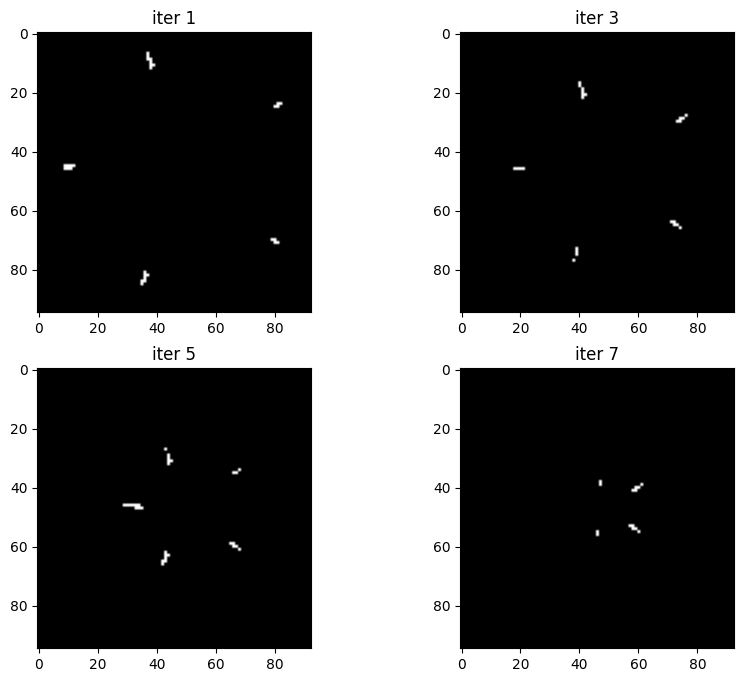

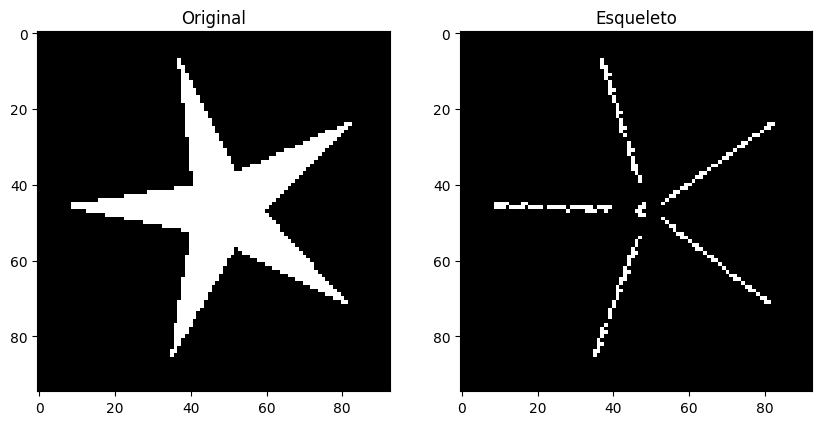

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
img = cv2.imread('estrella.png',0)
original=img.copy()
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
skel = np.zeros(img.shape, np.uint8)

iter=0;
i_save=[1,3,5,7]
save_imgs=[]
while True:
    iter=iter+1
    #Aplicamos la apertura: Podemos perder algún punto al hacer la erosion
    #que no se recupera con la dilatación
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    #temp contendra los puntos que fueron erosionados y al dilatar no se recuperaron
    temp = cv2.subtract(img, open)
    if (iter in i_save):
        save_imgs.append(temp) 
    #Erosionamos la imagen para controlar hasta cuando continuar
    eroded = cv2.erode(img, element)
    #Añadirmos al esqueleto final los puntos que se perdieron con la apertura
    skel = cv2.bitwise_or(skel,temp)
    #En la siguiente iteracion trabajamos con la erosionada
    img = eroded.copy()
    #Si no existe ningun pixel ya hemos erosionado todo. 
    if cv2.countNonZero(img)==0:
        break
plt.figure(figsize=(10,8))        
plt.subplot(2,2,1),plt.imshow(save_imgs[0],'gray') ,plt.title("iter 1")           
plt.subplot(2,2,2),plt.imshow(save_imgs[1],'gray') ,plt.title("iter 3")           
plt.subplot(2,2,3),plt.imshow(save_imgs[2],'gray') ,plt.title("iter 5")           
plt.subplot(2,2,4),plt.imshow(save_imgs[3],'gray') ,plt.title("iter 7")           
plt.figure(figsize=(10,8))        
plt.subplot(1,2,1),plt.imshow(original,'gray') ,plt.title("Original")   
plt.subplot(1,2,2),plt.imshow(skel,'gray') ,plt.title("Esqueleto")

(<Axes: title={'center': 'Stars'}>,
 Text(0.5, 1.0, 'Stars'))

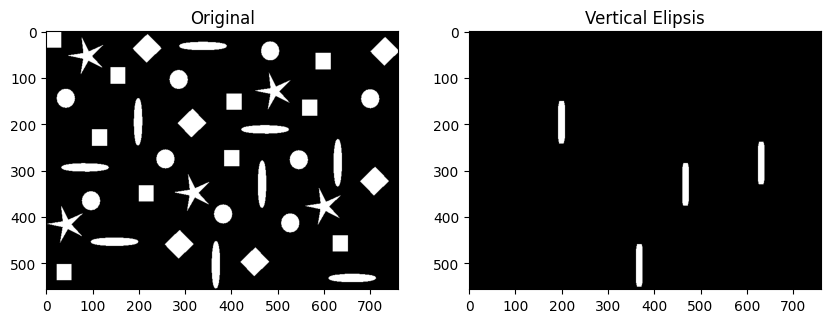

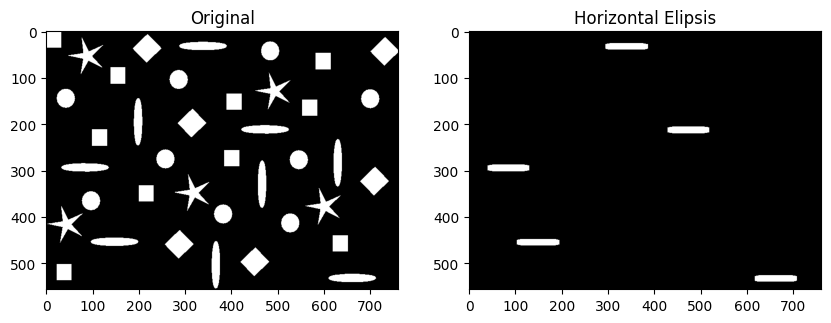

In [ ]:
# Ejercicio 1

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Detección de formas elípticas verticales
filename = "formas.png"
img = cv2.imread(filename)
k = np.ones((70, 10), np.uint8)
morph = cv2.morphologyEx(img, cv2.MORPH_OPEN, k)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(122), plt.imshow(morph, "gray"), plt.title("Vertical Elipsis")

# Detección de formas elípticas horizontales
k = np.ones((10, 70), np.uint8)
morph = cv2.morphologyEx(img, cv2.MORPH_OPEN, k)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(122), plt.imshow(morph, "gray"), plt.title("Horizontal Elipsis")

# Detección de cuadrados
k = np.ones((30, 30), np.uint8)
morph = cv2.morphologyEx(img, cv2.MORPH_OPEN, k)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(122), plt.imshow(morph, "gray"), plt.title("Squares")

# Detección de estrellas
k = cv2.imread("estrella.png", cv2.IMREAD_GRAYSCALE)
k = cv2.resize(k, (70, 70), interpolation=cv2.INTER_AREA)
morph = cv2.morphologyEx(img, cv2.MORPH_OPEN, k)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(122), plt.imshow(morph, "gray"), plt.title("Stars")


### Ejercicio
<ol>
    <li> Utiliza algunas de las operaciones morfológicas  para buscar formas en una imagen.  Como ayuda a este ejercicio pensad que el elemento estructural puede ser la imagen que queréis buscar. Para este ejercicio puedes usar las siguientes imágenes:
<ol>
    <li>formas.png, estrella.png, ovalo.png, cuadrado.png, cuadrado2.png,cuadrado3.png
   <li>texto.png, letra_i.png, letra_k.png, letra_m.png, letra_o.png, letra_p.png
   </ol>
</ol>        